In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv("unemployment.csv")

In [3]:
df.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2001 Jan,4.2,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001 Feb,4.2,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001 Mar,4.3,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001 Apr,4.4,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001 May,4.3,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# well, that's stupid, somehow spreadsheet export added a bunch of garbage columns
df = df.iloc[:, : 3]

In [5]:
df.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
0,2001 Jan,4.2,6.4
1,2001 Feb,4.2,5.4
2,2001 Mar,4.3,5.4
3,2001 Apr,4.4,5.2
4,2001 May,4.3,5.3


In [7]:
# let's fix those dates
df["Year"] = df["Year"].apply(lambda x: datetime.strptime(x, '%Y %b').date())

In [8]:
df.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
0,2001-01-01,4.2,6.4
1,2001-02-01,4.2,5.4
2,2001-03-01,4.3,5.4
3,2001-04-01,4.4,5.2
4,2001-05-01,4.3,5.3


In [39]:
def timeseries(in_dates, events, labels = ["", ""], title="", labelsize=12):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    numticks = 5

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname='Lato')

    ax.locator_params(nbins=numticks)
    ax.tick_params(axis='both',
               which='both',
               length=0,
               labelsize = labelsize,
               pad=labelsize * 0.66,
               labelcolor = (0.25, 0.25, 0.25))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color((0.1, 0.1, 0.1, 0.2))
    ax.spines['bottom'].set_color((0.1, 0.1, 0.1, 0.2))

    dates = np.array(in_dates)
    dates_sorted = (np.sort(dates))
    event1 = np.array(events[0])[np.argsort(dates)]
    p1 = ax.plot(dates_sorted, event1, 'k-', label=labels[0])
    if len(events) > 1:
        event2 = np.array(events[1])[np.argsort(dates)]
        p2 = ax.plot(dates_sorted, event2, color=(0.6, 0.6, 0.6), linestyle='-', label=labels[1])
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, framealpha=0)
    return fig

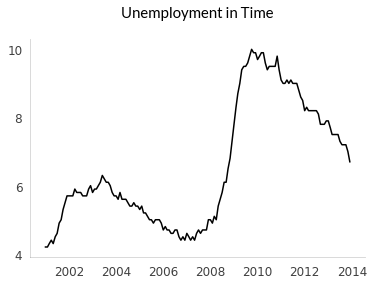

In [40]:
fig = timeseries(df["Year"], [df["Unemployment Rate"]], ["unemployment"], "Unemployment in Time")

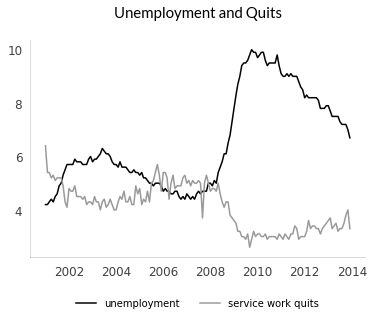

In [41]:
fig2 = timeseries(df["Year"], [df["Unemployment Rate"], df["Accommodation and food services Quit rate"]], ["unemployment", "service work quits"], "Unemployment and Quits")

In [35]:
# let's make sure this works right with out-of-order rows.
disorganized = df.sample(frac=1)

In [36]:
disorganized.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
1,2001-02-01,4.2,5.4
124,2011-05-01,9.0,2.9
128,2011-09-01,9.0,3.3
54,2005-07-01,5.0,5.0
58,2005-11-01,5.0,5.3


In [37]:
df.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
0,2001-01-01,4.2,6.4
1,2001-02-01,4.2,5.4
2,2001-03-01,4.3,5.4
3,2001-04-01,4.4,5.2
4,2001-05-01,4.3,5.3


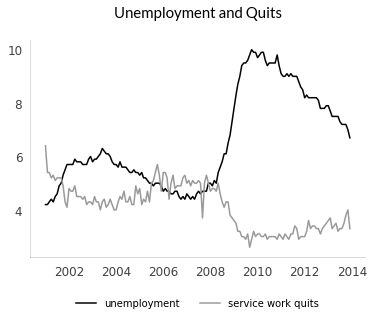

In [42]:
fig3 = timeseries(disorganized["Year"], [disorganized["Unemployment Rate"], disorganized["Accommodation and food services Quit rate"]], ["unemployment", "service work quits"], "Unemployment and Quits")